<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/95_C_DOE_Anidado1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit
from bioinfokit.analys import stat
!pip install pingouin
import pingouin as pg

#  **Tema 4: Diseños Cuadrados Latinos - DCL usando Python: Versión 2**

##  <span style="color:green">**Ejemplo. Para comparar el consumo de gasolina de cuatro automoviles, A, B, C y D, cuatro conductores, Juan, Santiago, Emilio y Pepe, efectuan un recorrido prefijado en cuatro dias diferentes, de manera que cada conductor utiliza un coche diferente cada día. Tanto la asignación de los coches a sus conductores como el orden de los dias se hizo de forma aleatoria. Disponemos de los siguientes datos correspondientes a los litros consumidos cada 100 km. Se cree, además, que la visibilidad puede influir sobre el consumo. Para evitar que en las circustancias anteriores los conductores se terminen cansando, se decide utilizar distintos grupos de conductores para cada turno y se obtienen los siguientes datos**</span>

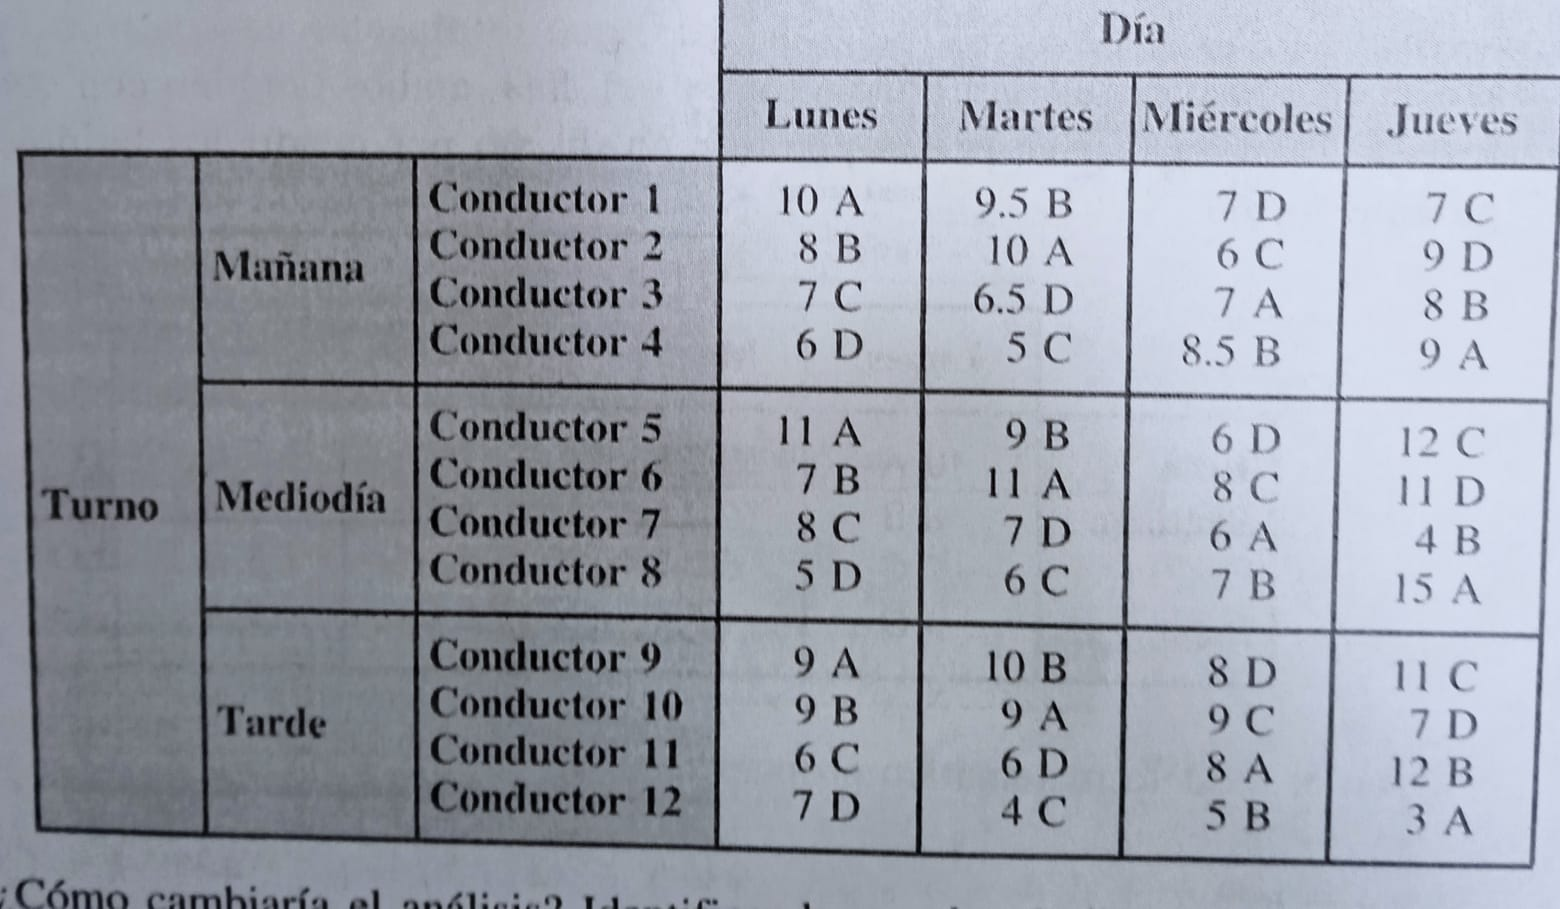



## **4.1 Los Datos del Problema**

In [ ]:
## **4.1 Los Datos del Problema**
Turno =  ([ "Mañana"]*16 + ["Mediodia"]*16 +  ["Tarde"]*16)*1
Conductor= [ "C1", "C1", "C1", "C1", "C2", "C2", "C2", "C2", "C3", "C3", "C3", "C3", "C4", "C4", "C4", "C4",
            "C5", "C5", "C5", "C5", "C6", "C6", "C6", "C6", "C7", "C7", "C7", "C7", "C8", "C8", "C8", "C8",
            "C9", "C9", "C9", "C9", "C10", "C10", "C10", "C10", "C11", "C11", "C11", "C11", "C12", "C12", "C12",  "C12"]
Dia  =  [ "Lunes", "Martes", "Miercoles", "Jueves", "Lunes", "Martes", "Miercoles", "Jueves", "Lunes", "Martes", "Miercoles", "Jueves", "Lunes", "Martes", "Miercoles", "Jueves",
        "Lunes", "Martes", "Miercoles", "Jueves", "Lunes", "Martes", "Miercoles", "Jueves", "Lunes", "Martes", "Miercoles", "Jueves", "Lunes", "Martes", "Miercoles", "Jueves",
        "Lunes", "Martes", "Miercoles", "Jueves", "Lunes", "Martes", "Miercoles", "Jueves", "Lunes", "Martes", "Miercoles", "Jueves", "Lunes", "Martes", "Miercoles", "Jueves"]


AUTO = [ 'A', 'B',	'D', 'C', 'B', 'A',	'C',	'D', 'C',	'D',	'A', 'B', 'D',	'C',	'B',	'A',
         'A',	'B',	'D', 'C',	'B', 'A',	'C',	'D', 'C',	'D',	'A',	'B',	'D', 'C', 'B', 'A',
         'A',	'B',	'D',	'C','B',	'A',	'C', 'D',	'C', 'D', 'A',	'B', 'D',	'C',	'B',	'A']

Consumo =[10, 9.5,	7,	7,	8,	10,	6,	9,	7,	6.5,	7,	8,	6,	5,	8.5,	9,	11,
          9,	6,	12,	7,	11,	8,	11,	8,	7,	6,	4,	5,	6,	7,	15,	9,	10,	8,	11,
          9,	9,	9,	7,	6,	6,	8,	12,	7,	4,	5,	3]


## **4.2 Construyamos el dataFrame de los precios y productos**

In [ ]:
## **4.2 Construyamos el dataFrame de los precios y productos**
import pandas as pd
DCL = pd.DataFrame({'Turno':Turno, 'Conductor':Conductor, 'Dia':Dia, 'AUTO':AUTO, 'Consumo':Consumo})


## **4.3 Veamos el DataFrame**

In [ ]:
## **4.3 Veamos el DataFrame**
DCL

,Turno,Conductor,Dia,AUTO,Consumo
0,Mañana,C1,Lunes,A,10.0
1,Mañana,C1,Martes,B,9.5
2,Mañana,C1,Miercoles,D,7.0
3,Mañana,C1,Jueves,C,7.0
4,Mañana,C2,Lunes,B,8.0
5,Mañana,C2,Martes,A,10.0
6,Mañana,C2,Miercoles,C,6.0
7,Mañana,C2,Jueves,D,9.0
8,Mañana,C3,Lunes,C,7.0
9,Mañana,C3,Martes,D,6.5


## **4.5. BoxPlot para DCL - Consumo**

<Axes: title={'center': 'Consumo vs Turno'}, xlabel='Turno', ylabel='Consumo'>

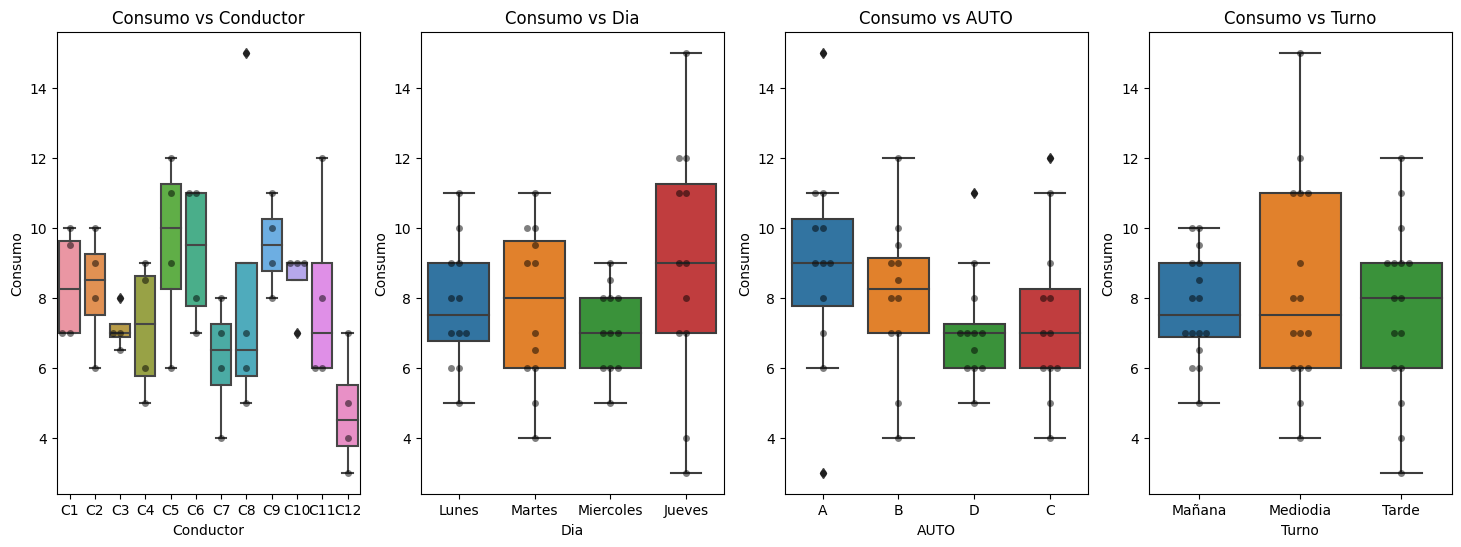

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].set_title('Consumo vs Conductor')
sns.boxplot(x="Conductor", y="Consumo", data=DCL, ax=axs[0])
sns.swarmplot(x="Conductor", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Consumo vs Dia')
sns.boxplot(x="Dia", y="Consumo", data=DCL, ax=axs[1])
sns.swarmplot(x="Dia", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Consumo vs AUTO')
sns.boxplot(x="AUTO", y="Consumo", data=DCL, ax=axs[2])
sns.swarmplot(x="AUTO", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('Consumo vs Turno')
sns.boxplot(x="Turno", y="Consumo", data=DCL, ax=axs[3])
sns.swarmplot(x="Turno", y="Consumo", data=DCL, color='black',
              alpha = 0.5, ax=axs[3])

## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**

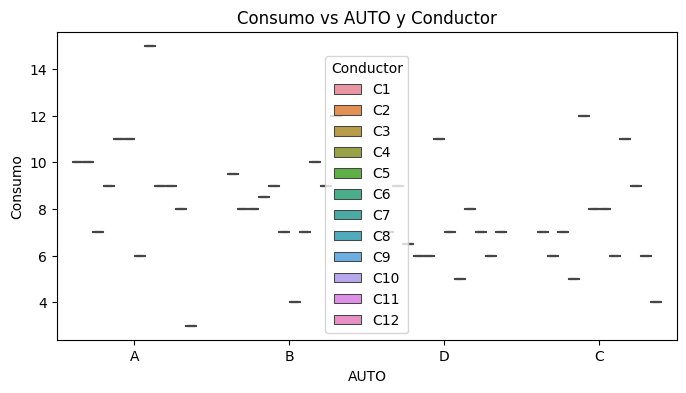

In [ ]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Consumo vs AUTO y Conductor')
sns.boxplot(x="AUTO", y="Consumo", hue='Conductor', data=DCL, ax=ax);

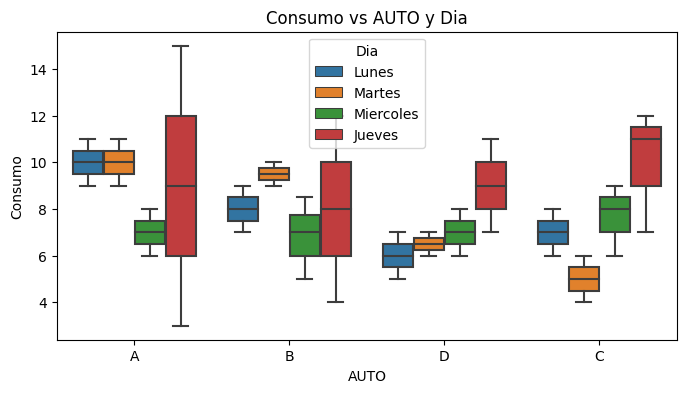

In [ ]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Consumo vs AUTO y Dia')
sns.boxplot(x="AUTO", y="Consumo", hue='Dia', data=DCL, ax=ax);

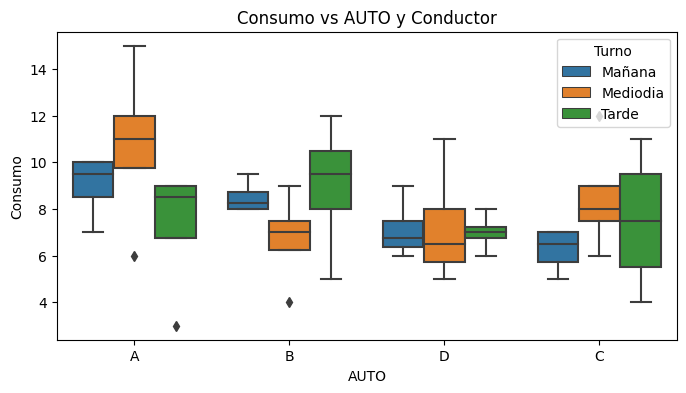

In [ ]:
## **4.6 Diagrama Bivariado no es sposible dado que no hay replicas**
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('Consumo vs AUTO y Conductor')
sns.boxplot(x="AUTO", y="Consumo", hue='Turno', data=DCL, ax=ax);

## **4.7 Creando los DataFrame usando ChatGPT - Análisis de Varianza Tipo I**
# **a. Chat GPT 1**



In [ ]:
import pandas as pd

# Definir los datos en forma de diccionario
data = {
    'CONDUCTOR': ['JUAN', 'JUAN', 'JUAN', 'JUAN', 'JUAN', 'JUAN', 'JUAN', 'JUAN', 'JUAN', 'JUAN', 'JUAN', 'JUAN',
                  'SANTIAGO', 'SANTIAGO', 'SANTIAGO', 'SANTIAGO', 'SANTIAGO', 'SANTIAGO', 'SANTIAGO', 'SANTIAGO', 'SANTIAGO', 'SANTIAGO', 'SANTIAGO', 'SANTIAGO',
                  'EMILIO', 'EMILIO', 'EMILIO', 'EMILIO', 'EMILIO', 'EMILIO', 'EMILIO', 'EMILIO', 'EMILIO', 'EMILIO', 'EMILIO', 'EMILIO',
                  'PEPE', 'PEPE', 'PEPE', 'PEPE', 'PEPE', 'PEPE', 'PEPE', 'PEPE', 'PEPE', 'PEPE', 'PEPE', 'PEPE'],
    'DIA': ['LUNES', 'LUNES', 'LUNES', 'MARTES', 'MARTES', 'MARTES', 'MIÉRCOLES', 'MIÉRCOLES', 'MIÉRCOLES', 'JUEVES', 'JUEVES', 'JUEVES',
            'LUNES', 'LUNES', 'LUNES', 'MARTES', 'MARTES', 'MARTES', 'MIÉRCOLES', 'MIÉRCOLES', 'MIÉRCOLES', 'JUEVES', 'JUEVES', 'JUEVES',
            'LUNES', 'LUNES', 'LUNES', 'MARTES', 'MARTES', 'MARTES', 'MIÉRCOLES', 'MIÉRCOLES', 'MIÉRCOLES', 'JUEVES', 'JUEVES', 'JUEVES',
            'LUNES', 'LUNES', 'LUNES', 'MARTES', 'MARTES', 'MARTES', 'MIÉRCOLES', 'MIÉRCOLES', 'MIÉRCOLES', 'JUEVES', 'JUEVES', 'JUEVES'],
    'TURNO': ['MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE',
              'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE',
              'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE',
              'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE', 'MAÑAMA', 'MEDIODIA', 'TARDE'],
    'AUTO': ['A', 'A', 'A', 'B', 'B', 'B', 'D', 'D', 'D', 'C', 'C', 'C',
             'B', 'B', 'B', 'A', 'A', 'A', 'C', 'C', 'C', 'D', 'D', 'D',
             'C', 'C', 'C', 'D', 'D', 'D', 'A', 'A', 'A', 'B', 'B', 'B',
             'D', 'D', 'D', 'C', 'C', 'C', 'A', 'A', 'A', 'D', 'D', 'D'],
    'CONSUMO': [10, 11, 9, 9.5, 9, 10, 7, 6, 8, 7, 12, 11,
                 8, 7, 9, 10, 11, 9, 6, 8, 9, 9, 11, 7,
                 7, 8, 6, 6.5, 7, 6, 7, 6, 8, 8, 4, 12,
                 6, 5, 7, 5, 6, 4, 8.5, 7, 5, 9, 15, 3]
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Imprimir el DataFrame
print(df)


   CONDUCTOR        DIA     TURNO AUTO  CONSUMO
0       JUAN      LUNES    MAÑAMA    A     10.0
1       JUAN      LUNES  MEDIODIA    A     11.0
2       JUAN      LUNES     TARDE    A      9.0
3       JUAN     MARTES    MAÑAMA    B      9.5
4       JUAN     MARTES  MEDIODIA    B      9.0
5       JUAN     MARTES     TARDE    B     10.0
6       JUAN  MIÉRCOLES    MAÑAMA    D      7.0
7       JUAN  MIÉRCOLES  MEDIODIA    D      6.0
8       JUAN  MIÉRCOLES     TARDE    D      8.0
9       JUAN     JUEVES    MAÑAMA    C      7.0
10      JUAN     JUEVES  MEDIODIA    C     12.0
11      JUAN     JUEVES     TARDE    C     11.0
12  SANTIAGO      LUNES    MAÑAMA    B      8.0
13  SANTIAGO      LUNES  MEDIODIA    B      7.0
14  SANTIAGO      LUNES     TARDE    B      9.0
15  SANTIAGO     MARTES    MAÑAMA    A     10.0
16  SANTIAGO     MARTES  MEDIODIA    A     11.0
17  SANTIAGO     MARTES     TARDE    A      9.0
18  SANTIAGO  MIÉRCOLES    MAÑAMA    C      6.0
19  SANTIAGO  MIÉRCOLES  MEDIODIA    C  

In [ ]:
#nido <- aov (DCL['Consumo'] ~ DCL['AUTO'] + DCL['Turno']/DCL['Conductor'] + DCL['Dia'])

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Crear un DataFrame con tus datos


# Realizar el ANOVA
modelo = ols('CONSUMO ~ AUTO + TURNO + CONDUCTOR + DIA', data=df).fit()
anova_tabla = sm.stats.anova_lm(modelo)

# Imprimir la tabla ANOVA
print(anova_tabla)


             df      sum_sq    mean_sq         F    PR(>F)
AUTO        3.0   12.182292   4.060764  0.884955  0.458105
TURNO       2.0    3.968750   1.984375  0.432451  0.652243
CONDUCTOR   3.0   44.497299  14.832433  3.232407  0.033524
DIA         3.0   35.487820  11.829273  2.577933  0.068769
Residual   36.0  165.191964   4.588666       NaN       NaN


# **b. Chat GPT 2**

In [ ]:
import pandas as pd

# Definir los datos en forma de lista de listas
data2 = [
    ["MAÑANA", "C1", "LUNES", "A", 10],
    ["MAÑANA", "C1", "MARTES", "B", 9.5],
    ["MAÑANA", "C1", "MIERCOLES", "D", 7],
    ["MAÑANA", "C1", "JUEVES", "C", 7],
    ["MAÑANA", "C2", "LUNES", "B", 8],
    ["MAÑANA", "C2", "MARTES", "A", 10],
    ["MAÑANA", "C2", "MIERCOLES", "C", 6],
    ["MAÑANA", "C2", "JUEVES", "D", 9],
    ["MAÑANA", "C3", "LUNES", "C", 7],
    ["MAÑANA", "C3", "MARTES", "D", 6.5],
    ["MAÑANA", "C3", "MIERCOLES", "A", 7],
    ["MAÑANA", "C3", "JUEVES", "B", 8],
    ["MAÑANA", "C4", "LUNES", "D", 6],
    ["MAÑANA", "C4", "MARTES", "C", 5],
    ["MAÑANA", "C4", "MIERCOLES", "B", 8.5],
    ["MAÑANA", "C4", "JUEVES", "A", 9],
    ["MEDIODIA", "C5", "LUNES", "A", 11],
    ["MEDIODIA", "C5", "MARTES", "B", 9],
    ["MEDIODIA", "C5", "MIERCOLES", "D", 6],
    ["MEDIODIA", "C5", "JUEVES", "C", 12],
    ["MEDIODIA", "C6", "LUNES", "B", 7],
    ["MEDIODIA", "C6", "MARTES", "A", 11],
    ["MEDIODIA", "C6", "MIERCOLES", "C", 8],
    ["MEDIODIA", "C6", "JUEVES", "D", 11],
    ["MEDIODIA", "C7", "LUNES", "C", 8],
    ["MEDIODIA", "C7", "MARTES", "D", 7],
    ["MEDIODIA", "C7", "MIERCOLES", "A", 6],
    ["MEDIODIA", "C7", "JUEVES", "B", 4],
    ["MEDIODIA", "C8", "LUNES", "D", 5],
    ["MEDIODIA", "C8", "MARTES", "C", 6],
    ["MEDIODIA", "C8", "MIERCOLES", "B", 7],
    ["MEDIODIA", "C8", "JUEVES", "A", 15],
    ["TARDE", "C9", "LUNES", "A", 9],
    ["TARDE", "C9", "MARTES", "B", 10],
    ["TARDE", "C9", "MIERCOLES", "D", 8],
    ["TARDE", "C9", "JUEVES", "C", 11],
    ["TARDE", "C10", "LUNES", "B", 9],
    ["TARDE", "C10", "MARTES", "A", 9],
    ["TARDE", "C10", "MIERCOLES", "C", 9],
    ["TARDE", "C10", "JUEVES", "D", 7],
    ["TARDE", "C11", "LUNES", "C", 6],
    ["TARDE", "C11", "MARTES", "D", 6],
    ["TARDE", "C11", "MIERCOLES", "A", 8],
    ["TARDE", "C11", "JUEVES", "B", 12],
    ["TARDE", "C12", "LUNES", "D", 7],
    ["TARDE", "C12", "MARTES", "C", 4],
    ["TARDE", "C12", "MIERCOLES", "B", 5],
    ["TARDE", "C12", "JUEVES", "A", 3],
]

# Definir el nombre de las columnas
columnas = ["TURNO", "CONDUCTOR", "DIA", "VEHICULO", "CONSUMO"]

# Crear el DataFrame
df2 = pd.DataFrame(data2, columns=columnas)

# Imprimir el DataFrame
print(df2)


       TURNO CONDUCTOR        DIA VEHICULO  CONSUMO
0     MAÑANA        C1      LUNES        A     10.0
1     MAÑANA        C1     MARTES        B      9.5
2     MAÑANA        C1  MIERCOLES        D      7.0
3     MAÑANA        C1     JUEVES        C      7.0
4     MAÑANA        C2      LUNES        B      8.0
5     MAÑANA        C2     MARTES        A     10.0
6     MAÑANA        C2  MIERCOLES        C      6.0
7     MAÑANA        C2     JUEVES        D      9.0
8     MAÑANA        C3      LUNES        C      7.0
9     MAÑANA        C3     MARTES        D      6.5
10    MAÑANA        C3  MIERCOLES        A      7.0
11    MAÑANA        C3     JUEVES        B      8.0
12    MAÑANA        C4      LUNES        D      6.0
13    MAÑANA        C4     MARTES        C      5.0
14    MAÑANA        C4  MIERCOLES        B      8.5
15    MAÑANA        C4     JUEVES        A      9.0
16  MEDIODIA        C5      LUNES        A     11.0
17  MEDIODIA        C5     MARTES        B      9.0
18  MEDIODIA

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Crear un DataFrame con tus datos


# Realizar el ANOVA
modelo = ols('CONSUMO ~ AUTO + CONDUCTOR/TURNO + DIA', data=df2).fit()
anova_tabla = sm.stats.anova_lm(modelo)

# Imprimir la tabla ANOVA
print(anova_tabla)


                   df      sum_sq   mean_sq         F    PR(>F)
AUTO              3.0   24.932292  8.310764  1.953718  0.142247
CONDUCTOR        11.0   86.515625  7.865057  1.848940  0.089245
DIA               3.0   22.265625  7.421875  1.744756  0.179048
CONDUCTOR:TURNO  24.0   88.145494  3.672729  0.863396  0.640627
Residual         30.0  127.614583  4.253819       NaN       NaN


## **4.8 Análisis de Varianza Tipo I - Usando Python y Statgraphics**



In [ ]:
import pandas as pd
import statsmodels.formula.api as smf

nobs = 4
nT = 3
nC = 4
T = [f"T{i}" for i in range(1,nT+1) for h in range(nobs*nC)]
C = [f"C{j}" for i in range(1,nT+1) for j in range(1,nC+1) for h in range(nobs)]
obs = list(range(4))*nT*nC

data = (10, 9.5,	7,	7,	8,	10,	6,	9,	7,	6.5,	7,	8,	6,	5,	8.5,	9,	11,
          9,	6,	12,	7,	11,	8,	11,	8,	7,	6,	4,	5,	6,	7,	15,	9,	10,	8,	11,
          9,	9,	9,	7,	6,	6,	8,	12,	7,	4,	5,	3)

df3 = pd.DataFrame(data ={
    "TURNO": T,
    "CONDUCTOR": C, 'Dia':Dia, 'AUTO':AUTO, 'Consumo':Consumo,
    "Observation_number": obs,
},dtype="category")
df3 = df3.join(pd.Series(data=data,name="y"))

model = smf.ols("y ~ AUTO +  T/C + Dia",data=df3).fit()
anova_df = sm.stats.anova_lm(model)
print(anova_df)

            df      sum_sq   mean_sq         F    PR(>F)
AUTO       3.0   24.932292  8.310764  1.953718  0.142247
T          2.0    3.968750  1.984375  0.466493  0.631672
Dia        3.0   22.265625  7.421875  1.744756  0.179048
T:C        9.0   82.546875  9.171875  2.156151  0.055509
Residual  30.0  127.614583  4.253819       NaN       NaN


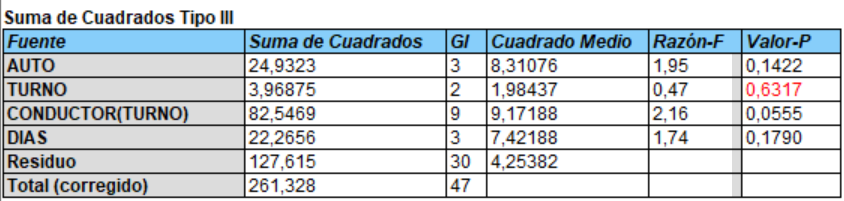

## **4.9 Comparaciones Múltiples**
### **a. Comparaciones Múltiples:DCL - AUTO**

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,-0.9167,0.7678,-3.4432,1.6099,False
A,C,-1.5833,0.3498,-4.1099,0.9432,False
A,D,-1.875,0.2105,-4.4016,0.6516,False
B,C,-0.6667,0.8948,-3.1932,1.8599,False
B,D,-0.9583,0.7429,-3.4849,1.5682,False
C,D,-0.2917,0.9897,-2.8182,2.2349,False


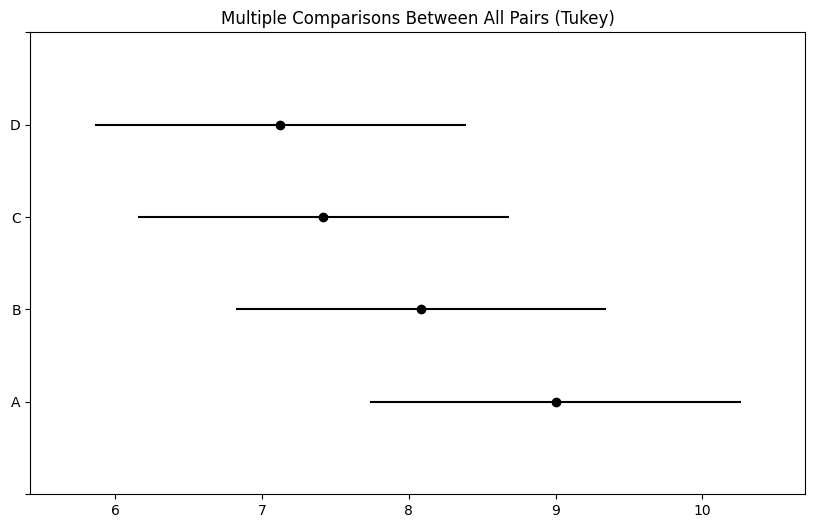

In [ ]:
### **a. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=df3["Consumo"],     # Data
                          groups=df3["AUTO"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

### **a. Comparaciones Múltiples:DCL - AUTO - Usando Statgraphics**

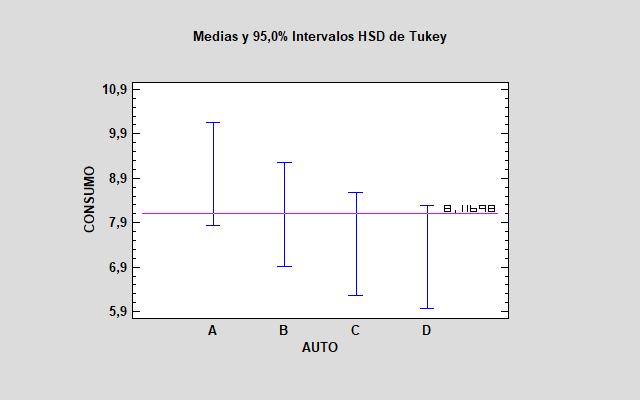

### **b. Comparaciones Múltiples: DCL - Conductor - Usando Python y Statgraphics**

group1,group2,meandiff,p-adj,lower,upper,reject
C1,C2,-0.4583,0.9559,-2.8511,1.9344,False
C1,C3,-2.0,0.1306,-4.3928,0.3928,False
C1,C4,-2.4167,0.0469,-4.8094,-0.0239,True
C2,C3,-1.5417,0.3256,-3.9344,0.8511,False
C2,C4,-1.9583,0.1433,-4.3511,0.4344,False
C3,C4,-0.4167,0.9663,-2.8094,1.9761,False


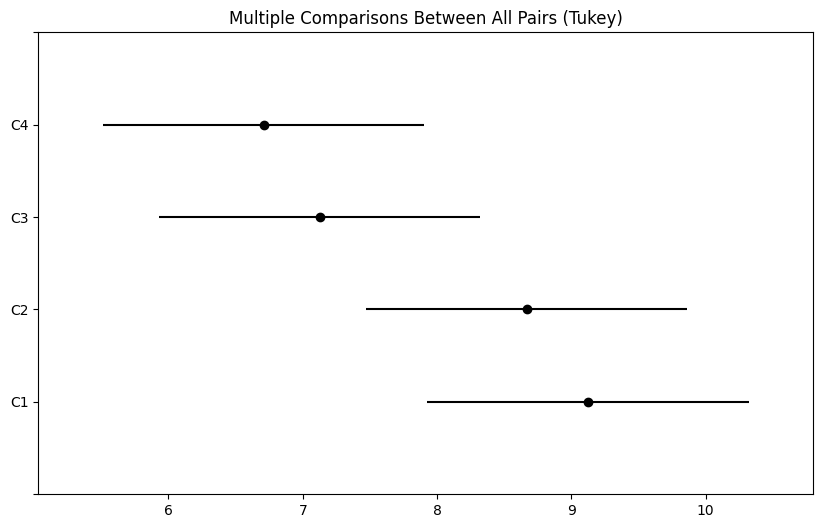

In [ ]:
### **b. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=df3["Consumo"],     # Data
                          groups=df3["CONDUCTOR"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

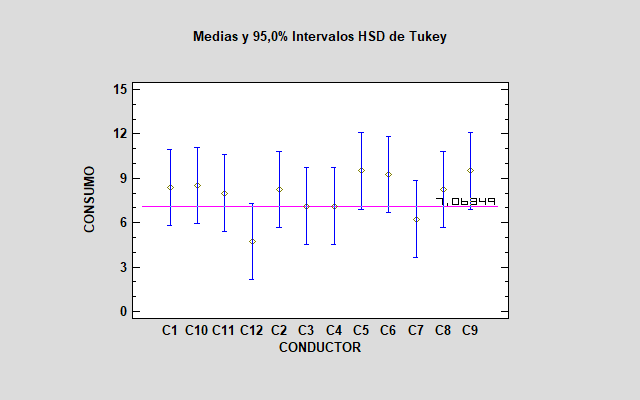

### **c. Comparaciones Múltiples: DCL - Dia - Usando Python y Statgraphics**

group1,group2,meandiff,p-adj,lower,upper,reject
Jueves,Lunes,-1.25,0.5594,-3.7908,1.2908,False
Jueves,Martes,-1.25,0.5594,-3.7908,1.2908,False
Jueves,Miercoles,-1.875,0.2147,-4.4158,0.6658,False
Lunes,Martes,0.0,1.0,-2.5408,2.5408,False
Lunes,Miercoles,-0.625,0.9126,-3.1658,1.9158,False
Martes,Miercoles,-0.625,0.9126,-3.1658,1.9158,False


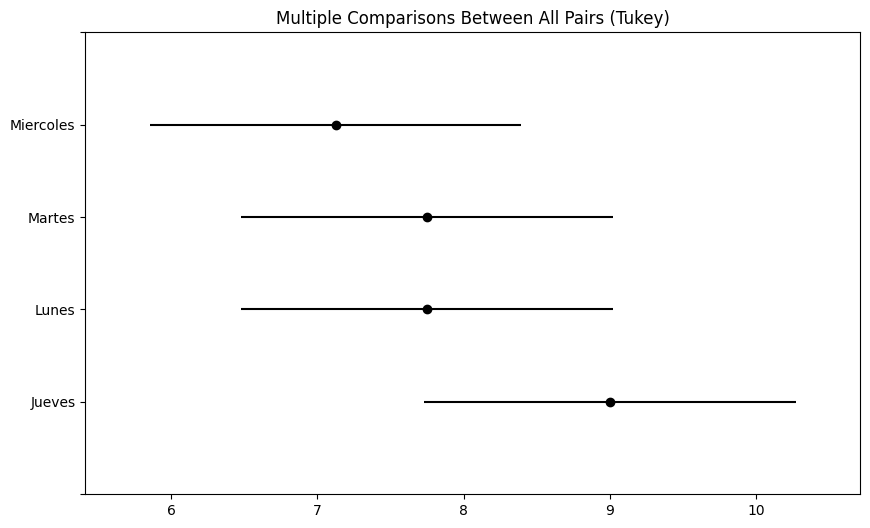

In [ ]:
### **c. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=df3["Consumo"],     # Data
                          groups=df3["Dia"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

In [ ]:
df3 = pd.DataFrame(data ={
    "TURNO": T,
    "CONDUCTOR": C, 'Dia':Dia, 'AUTO':AUTO, 'Consumo':Consumo,
    "Observation_number": obs,
},dtype="category")

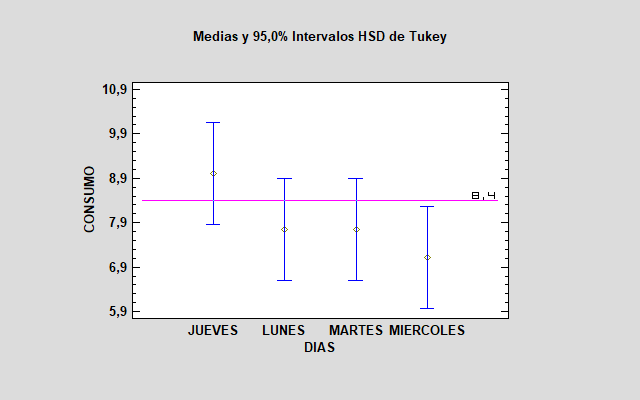

### **c. Comparaciones Múltiples: DCL - Turno - Usando Pytho y Statgraphics**

group1,group2,meandiff,p-adj,lower,upper,reject
T1,T2,0.5938,0.7634,-1.4554,2.6429,False
T1,T3,-0.0312,0.9992,-2.0804,2.0179,False
T2,T3,-0.625,0.7416,-2.6742,1.4242,False


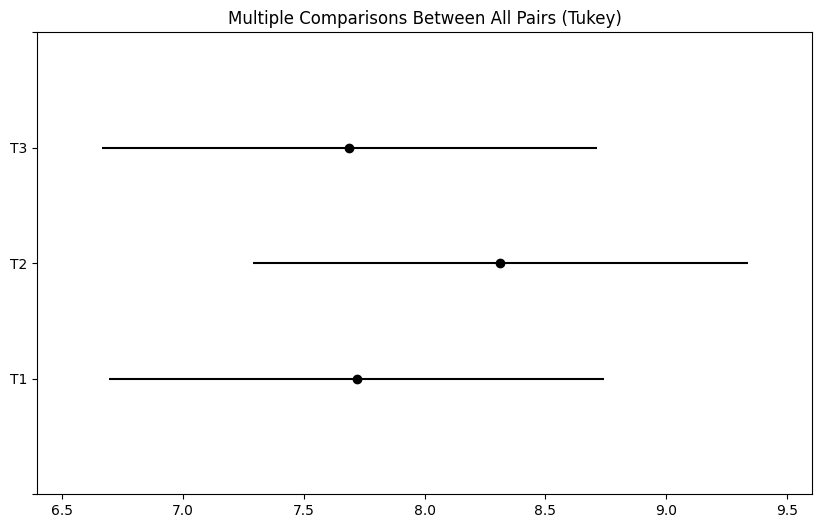

In [ ]:
### **c. Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=df3["Consumo"],     # Data
                          groups=df3["TURNO"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

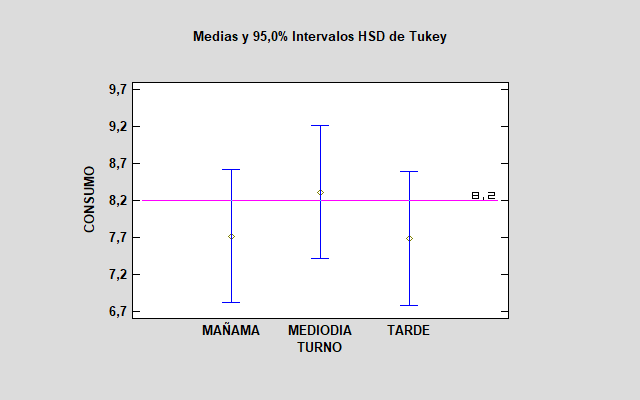

## **4.10 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [ ]:
# **a. Forma 1. Shapiro Wilks**
statistic, pvalue = stats.shapiro(model.resid)
print(f'El valor critico Shapiro wilks es {round(statistic,3)} y el valor p = {round(pvalue,1)*100} > 5%')

El valor critico Shapiro wilks es 0.988 y el valor p = 90.0 > 5%


# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

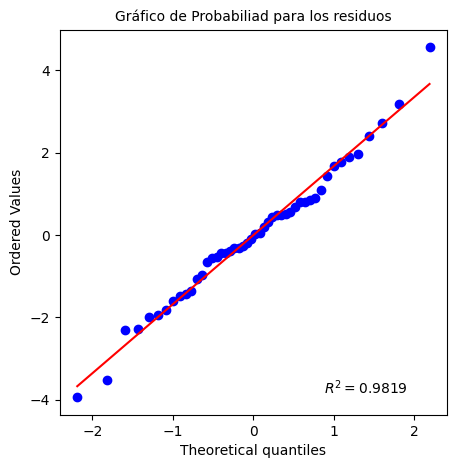

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

## **c. Homocedasticidad de los residuos: Usando la prueba de Levene**

In [ ]:
# e. Homocedasticidad de los residuos: Usando la prueba de Levene
statistic, pvalue = stats.levene(DCL['Consumo'][DCL['AUTO'] == 'A'],
             DCL['Consumo'][DCL['AUTO'] == 'B'],
             DCL['Consumo'][DCL['AUTO'] == 'C'],
             DCL['Consumo'][DCL['AUTO'] == 'D'])
print(f'El valor critico Levene es {round(statistic,3)} y el valor p = {round(pvalue,1)*100}% > 5%')


El valor critico Levene es 0.783 y el valor p = 50.0% > 5%
